In this notebook, we try to analyze how height correlates to various statistics for the 2018-2019 NBA players.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

url = "https://raw.githubusercontent.com/austin-ng/data301/master/finalproject/EQcsv/nbaseasonavgs.csv"

df_avgs = pd.read_csv(url)
df_avgs.drop("Unnamed: 0", axis=1, inplace=True)
df_avgs

,games_played,player_id,season,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_name,player_height_ft,player_height_in,player_weight,player_position,height (cm),minutes/gm
0,80,3,2018,33:19,6.01,10.09,0.00,0.03,1.83,3.65,4.89,4.61,9.50,1.55,1.48,0.95,1.71,2.55,13.85,0.596,0.000,0.500,Steven Adams,7.0,0.0,265.0,C,213.36,33.316667
1,81,6,2018,33:10,8.44,16.28,0.12,0.52,4.31,5.09,3.11,6.09,9.20,2.40,0.53,1.32,1.78,2.21,21.32,0.519,0.238,0.847,LaMarcus Aldridge,6.0,11.0,260.0,F,210.82,33.166667
2,48,8,2018,8:40,1.40,3.71,0.67,2.06,0.94,1.25,0.06,0.44,0.50,0.52,0.10,0.13,0.69,0.98,4.40,0.376,0.323,0.750,Grayson Allen,6.0,5.0,198.0,G,195.58,8.666667
3,80,9,2018,26:12,4.19,7.10,0.08,0.56,2.46,3.48,2.40,6.01,8.41,1.38,0.55,1.50,1.30,2.30,10.91,0.590,0.133,0.709,Jarrett Allen,6.0,11.0,237.0,C,210.82,26.200000
4,82,10,2018,27:56,3.13,7.23,1.17,3.41,1.83,2.11,1.37,6.07,7.44,1.27,0.83,0.40,0.88,1.74,9.27,0.433,0.343,0.867,Al-Farouq Aminu,6.0,9.0,220.0,F,205.74,27.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3,1988,2018,4:15,1.00,2.00,0.00,0.00,0.00,0.67,0.67,0.33,1.00,0.33,0.00,0.33,1.00,2.00,2.00,0.500,0.000,0.000,Donatas Motiejunas,NaN,NaN,NaN,NaN,NaN,4.250000
206,7,2106,2018,6:10,0.43,1.00,0.14,0.14,0.00,0.00,0.57,2.29,2.86,0.57,0.14,0.14,0.71,1.29,1.00,0.429,1.000,0.000,Eric Moreland,NaN,NaN,NaN,NaN,NaN,6.166667
207,30,2158,2018,13:14,0.87,2.10,0.30,0.93,0.43,0.50,0.23,1.37,1.60,0.97,0.77,0.10,0.57,1.27,2.47,0.413,0.321,0.867,Patrick McCaw,6.0,7.0,185.0,NaN,200.66,13.233333
208,40,2175,2018,24:28,2.95,6.30,1.85,4.45,1.40,1.78,0.63,2.88,3.50,1.00,0.53,0.28,0.88,2.00,9.15,0.468,0.416,0.789,Danuel House Jr.,6.0,7.0,220.0,NaN,200.66,24.466667


First, let's see if the height of the players in our dataset follows an intuitive distribution.

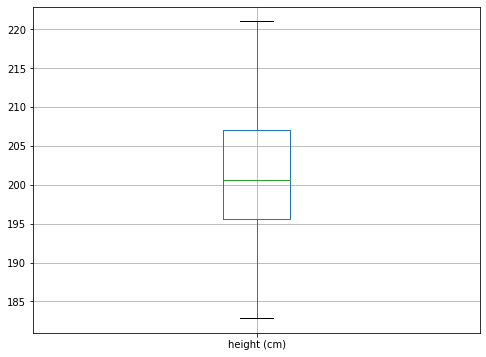

In [0]:
df_avgs.boxplot("height (cm)", figsize=(8, 6))

Text(0.5, 0, 'Height (cm)')

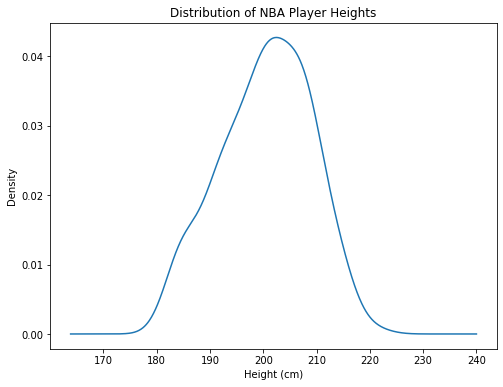

In [0]:
df_avgs["height (cm)"].plot.density(title="Distribution of NBA Player Heights",
                                    figsize=(8, 6))
plt.gca().set_xlabel("Height (cm)")

The boxplot of player heights is approximately symmetric and shows no skew. In addition, the density plot of heights seems is indeed a bell curve and approximates a normal distribution. Thus, our following analyses are much more effective and generalizable to other NBA players, which will be useful in predicting a player's height from their statistics.

We believe that the position a player plays will be dependent on that player's height. Let's explore this by creating a density plot.

Text(0.5, 0, 'Height (cm)')

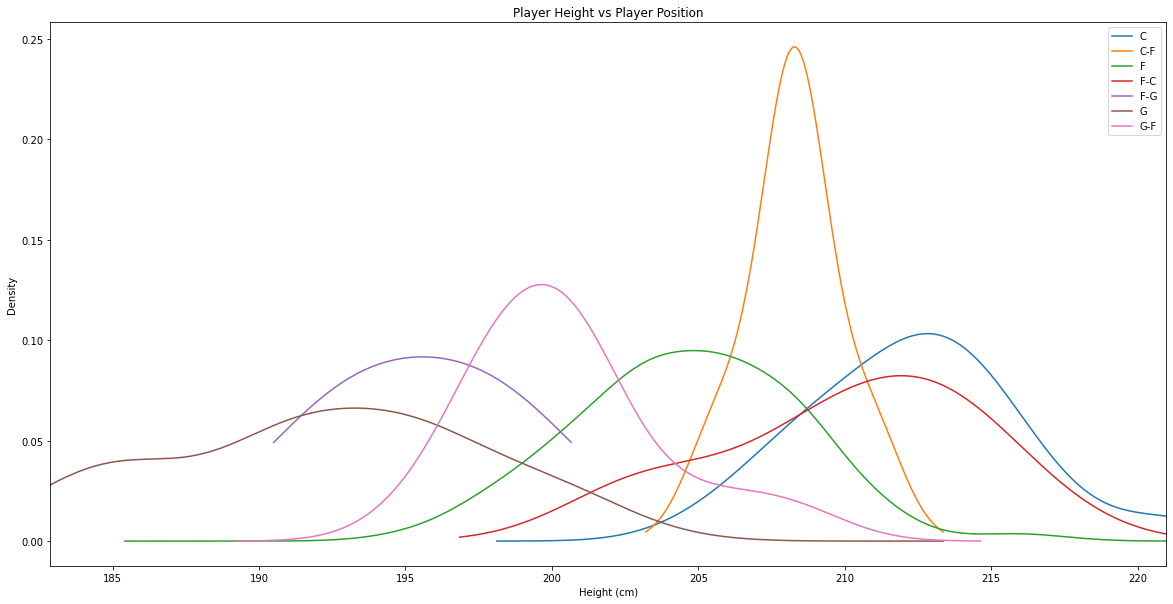

In [0]:
# need to groupby and plot in a for loop in order to get legend on the graph
for name, group in df_avgs.groupby("player_position"):
  group["height (cm)"].plot.density(label=name, legend=True,
                                    title="Player Height vs Player Position",
                                    figsize=(20,10),
                                    xlim=(df_avgs["height (cm)"].min(),
                                          df_avgs["height (cm)"].max()))
plt.gca().set_xlabel("Height (cm)")

From the above graph, we do indeed see some trends. Players who play C-F, F-C, or C are almost exclusively greater than the median height of all the players. On the other hand, none of the tallest players play positions F-G or G. The G position, or guard, is located farther from the net, outside the 3 point line, whereas positions C (center) and F (forward) are located closer to the net, inside the 3 point line. Thus, the graph shows that taller players tend to play more inside the 3 point line whereas shorter players tend to play outside the 3 point line. This makes sense from an intuitive standpoint, since taller players should have a better chance at getting rebounds and making plays if need be.


The below DataFrame also agrees with our analysis of the graph (notice how the means for G and F-G are significantly lower than the means for C, C-F, and F-C).

In [0]:
df_avgs.groupby("player_position")["height (cm)"].describe()

,count,mean,std,min,25%,50%,75%,max
player_position,,,,,,,,
C,18.0,212.372222,3.606746,205.74,210.82,213.36,213.36,220.98
C-F,6.0,208.280000,1.606437,205.74,208.28,208.28,208.28,210.82
F,69.0,204.635652,3.784471,195.58,203.20,205.74,208.28,215.90
F-C,10.0,210.058000,4.325464,203.20,208.28,210.82,213.36,215.90
F-G,2.0,195.580000,3.592102,193.04,194.31,195.58,196.85,198.12
G,77.0,192.182338,5.350373,182.88,187.96,193.04,195.58,203.20
G-F,15.0,200.490667,3.250898,195.58,198.12,200.66,200.66,208.28


We now decided to see how height correlates with statistics that we thought would intuitively correlate with height. These statistics include PPG (points per game), rebounds, blocks, and field goal percentage (ratio of field goals made to field goals attempted). Keep in mind that all the statistics in the df_avgs dataframe are averaged over all the games played for each specific player in the 2018-2019 NBA season.

In [0]:
# functions to plot the line of best fit (used for scatter plots)
def plot_line(x_vals, y_vals):
  df_copy = df_avgs.copy()
  df_copy.dropna(inplace=True)
  z = np.polyfit(x=df_copy[x_vals], y=df_copy[y_vals], deg=1)
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = z[1] + z[0] * x_vals
  plt.plot(x_vals, y_vals)

def plot_line_2(x_vals, y_vals):
  df_copy = df_avgs_per_min.copy()
  df_copy.dropna(inplace=True)
  z = np.polyfit(x=df_copy[x_vals], y=df_copy[y_vals], deg=1)
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = z[1] + z[0] * x_vals
  plt.plot(x_vals, y_vals, c="red")

-0.009576405389732414

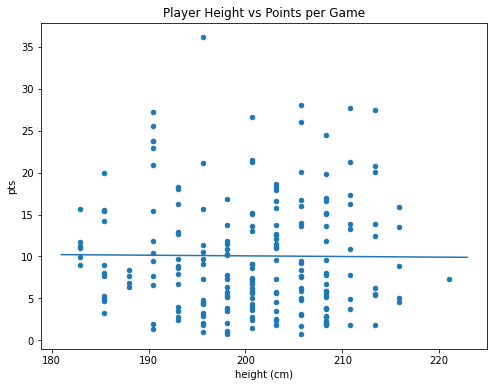

In [0]:
df_avgs.plot.scatter(x="height (cm)", y="pts",
                     title="Player Height vs Points per Game",
                     figsize=(8, 6))
plot_line("height (cm)", "pts")
df_avgs["height (cm)"].corr(df_avgs["pts"])

0.4440260155431025

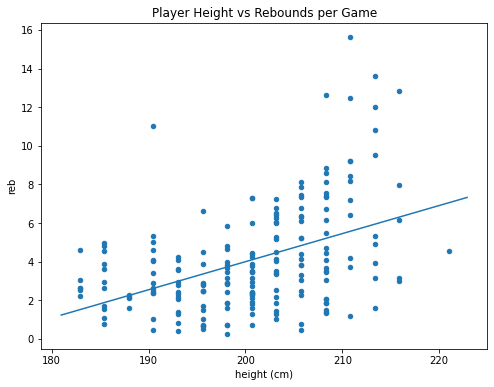

In [0]:
df_avgs.plot.scatter(x="height (cm)", y="reb",
                     title="Player Height vs Rebounds per Game",
                     figsize=(8, 6))
plot_line("height (cm)", "reb")
df_avgs["height (cm)"].corr(df_avgs["reb"])

0.5324333578492704

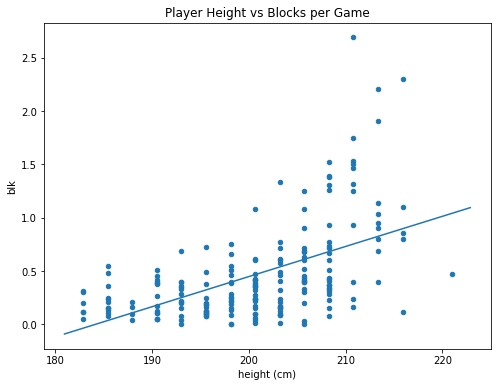

In [0]:
df_avgs.plot.scatter(x="height (cm)", y="blk",
                     title="Player Height vs Blocks per Game",
                     figsize=(8, 6))
plot_line("height (cm)", "blk")
df_avgs["height (cm)"].corr(df_avgs["blk"])

0.5162730919292913

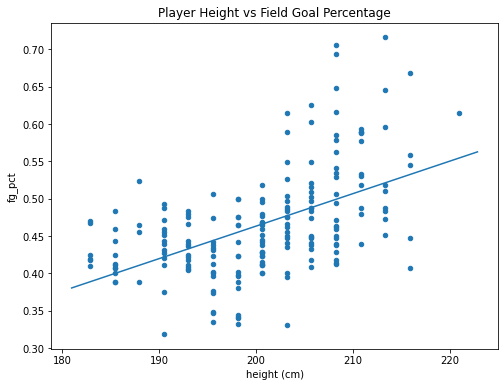

In [0]:
df_avgs.plot.scatter(x="height (cm)", y="fg_pct",
                     title="Player Height vs Field Goal Percentage",
                     figsize=(8, 6))
plot_line("height (cm)", "fg_pct")
df_avgs["height (cm)"].corr(df_avgs["fg_pct"])

Surprisingly, there is no linear relationship between the height of a player and the number of points per game they score. However, there was a positive correlation between height and rebounds, height and blocks, and height and field goal percentage. The correlation is moderate, with r≈0.50 for all 3 graphs. This was a bit lower than we expected the correlation to be.

Just to be sure that there is no other statistic that is a good predictor of height (strong correlation), we can find the correlations between the quantitative values of the whole dataframe.

In [0]:
# since we are only interested in the strength of the relationship right now,
# not the direction, we can take the absolute value of the whole series and
# then sort the values
np.abs(df_avgs.corr()["height (cm)"]).sort_values(ascending=False)

height (cm)         1.000000
player_weight       0.800546
player_height_in    0.540004
blk                 0.532433
fg_pct              0.516273
oreb                0.513463
player_height_ft    0.483968
reb                 0.444026
dreb                0.377055
fg3_pct             0.336991
fg3a                0.329388
fg3m                0.324987
ast                 0.322034
ft_pct              0.231797
pf                  0.197472
stl                 0.148669
fta                 0.127057
fga                 0.083030
ftm                 0.071979
minutes/gm          0.060564
player_id           0.049830
turnover            0.047631
fgm                 0.024640
pts                 0.009576
games_played        0.000328
season                   NaN
Name: height (cm), dtype: float64

The 3 statistics most correlated with height are the numer of blocks, field goal percentage, and the number of offensive rebounds (which contributed to total rebounds), just as we suspected. Note that while variables like the player's weight obviously correlate well with the player's height, they are not basketball statistics and therefore that relationship is not relevant.

Up until now, we have just been using the average statistics data for the whole season for each player. However, we also have data on the average number of minutes each player played per game. Therefore, we should adjust the statistics based on the average number of minutes played per game for each player, because some of the statistics depend on games played (like rebounds per game). For example, a player who played 10 minutes per game is less likely to get the same number of rebounds as a player who played 20 minutes per game. Thus, it is a good idea to transform the data. We chose to scale the statistics by just dividing by the number of minutes played. However, in order to do this, we first created a seconds columns for df_avgs.

In [0]:
df_avgs["sec"] = df_avgs["minutes/gm"] * 60
df_avgs

,games_played,player_id,season,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_name,player_height_ft,player_height_in,player_weight,player_position,height (cm),minutes/gm,sec
0,80,3,2018,33:19,6.01,10.09,0.00,0.03,1.83,3.65,4.89,4.61,9.50,1.55,1.48,0.95,1.71,2.55,13.85,0.596,0.000,0.500,Steven Adams,7.0,0.0,265.0,C,213.36,33.316667,1999.0
1,81,6,2018,33:10,8.44,16.28,0.12,0.52,4.31,5.09,3.11,6.09,9.20,2.40,0.53,1.32,1.78,2.21,21.32,0.519,0.238,0.847,LaMarcus Aldridge,6.0,11.0,260.0,F,210.82,33.166667,1990.0
2,48,8,2018,8:40,1.40,3.71,0.67,2.06,0.94,1.25,0.06,0.44,0.50,0.52,0.10,0.13,0.69,0.98,4.40,0.376,0.323,0.750,Grayson Allen,6.0,5.0,198.0,G,195.58,8.666667,520.0
3,80,9,2018,26:12,4.19,7.10,0.08,0.56,2.46,3.48,2.40,6.01,8.41,1.38,0.55,1.50,1.30,2.30,10.91,0.590,0.133,0.709,Jarrett Allen,6.0,11.0,237.0,C,210.82,26.200000,1572.0
4,82,10,2018,27:56,3.13,7.23,1.17,3.41,1.83,2.11,1.37,6.07,7.44,1.27,0.83,0.40,0.88,1.74,9.27,0.433,0.343,0.867,Al-Farouq Aminu,6.0,9.0,220.0,F,205.74,27.933333,1676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3,1988,2018,4:15,1.00,2.00,0.00,0.00,0.00,0.67,0.67,0.33,1.00,0.33,0.00,0.33,1.00,2.00,2.00,0.500,0.000,0.000,Donatas Motiejunas,NaN,NaN,NaN,NaN,NaN,4.250000,255.0
206,7,2106,2018,6:10,0.43,1.00,0.14,0.14,0.00,0.00,0.57,2.29,2.86,0.57,0.14,0.14,0.71,1.29,1.00,0.429,1.000,0.000,Eric Moreland,NaN,NaN,NaN,NaN,NaN,6.166667,370.0
207,30,2158,2018,13:14,0.87,2.10,0.30,0.93,0.43,0.50,0.23,1.37,1.60,0.97,0.77,0.10,0.57,1.27,2.47,0.413,0.321,0.867,Patrick McCaw,6.0,7.0,185.0,NaN,200.66,13.233333,794.0
208,40,2175,2018,24:28,2.95,6.30,1.85,4.45,1.40,1.78,0.63,2.88,3.50,1.00,0.53,0.28,0.88,2.00,9.15,0.468,0.416,0.789,Danuel House Jr.,6.0,7.0,220.0,NaN,200.66,24.466667,1468.0


In [0]:
# getting columns 3 to 20 of df_avgs because those are basketball statistics
df_avgs_per_min = df_avgs[df_avgs.select_dtypes(exclude="object").columns[3:21]]
df_avgs_per_min = df_avgs_per_min.divide(df_avgs["sec"] / 60, axis=0)
df_avgs_per_min["height (cm)"] = df_avgs["height (cm)"]
df_avgs_per_min

,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,height (cm)
0,0.180390,0.302851,0.000000,0.000900,0.054927,0.109555,0.146773,0.138369,0.285143,0.046523,0.044422,0.028514,0.051326,0.076538,0.415708,0.017889,0.000000,0.015008,213.36
1,0.254472,0.490854,0.003618,0.015678,0.129950,0.153467,0.093769,0.183618,0.277387,0.072362,0.015980,0.039799,0.053668,0.066633,0.642814,0.015648,0.007176,0.025538,210.82
2,0.161538,0.428077,0.077308,0.237692,0.108462,0.144231,0.006923,0.050769,0.057692,0.060000,0.011538,0.015000,0.079615,0.113077,0.507692,0.043385,0.037269,0.086538,195.58
3,0.159924,0.270992,0.003053,0.021374,0.093893,0.132824,0.091603,0.229389,0.320992,0.052672,0.020992,0.057252,0.049618,0.087786,0.416412,0.022519,0.005076,0.027061,210.82
4,0.112053,0.258831,0.041885,0.122076,0.065513,0.075537,0.049045,0.217303,0.266348,0.045465,0.029714,0.014320,0.031504,0.062291,0.331862,0.015501,0.012279,0.031038,205.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.235294,0.470588,0.000000,0.000000,0.000000,0.157647,0.157647,0.077647,0.235294,0.077647,0.000000,0.077647,0.235294,0.470588,0.470588,0.117647,0.000000,0.000000,NaN
206,0.069730,0.162162,0.022703,0.022703,0.000000,0.000000,0.092432,0.371351,0.463784,0.092432,0.022703,0.022703,0.115135,0.209189,0.162162,0.069568,0.162162,0.000000,NaN
207,0.065743,0.158690,0.022670,0.070277,0.032494,0.037783,0.017380,0.103526,0.120907,0.073300,0.058186,0.007557,0.043073,0.095970,0.186650,0.031209,0.024257,0.065516,200.66
208,0.120572,0.257493,0.075613,0.181880,0.057221,0.072752,0.025749,0.117711,0.143052,0.040872,0.021662,0.011444,0.035967,0.081744,0.373978,0.019128,0.017003,0.032248,200.66


Now that we have a dataframe which is adjusted for the number of minutes played per game, we can find the correlation between height and various variables again.

In [0]:
np.abs(df_avgs_per_min.corr()["height (cm)"]).sort_values(ascending=False)

height (cm)    1.000000
reb            0.722581
dreb           0.670701
oreb           0.647090
blk            0.549974
ast            0.443129
fg3a           0.413353
fg3m           0.403011
pf             0.374080
fta            0.216838
fg_pct         0.159962
stl            0.150151
ftm            0.132212
fga            0.126223
fgm            0.119306
fg3_pct        0.092351
pts            0.041963
ft_pct         0.025782
turnover       0.001173
Name: height (cm), dtype: float64

This significantly increased the strength of the relationship between height and rebounds (from r=0.44 to r=0.72) and barely increased the strength of the relationship between height and blocks (from r=0.53 to r=0.55). However, it greatly reduced the strength of the relationship between height and field goal percentage (from r=0.52 to r=0.16). Let's examine the significant disparities in a bit more detail.

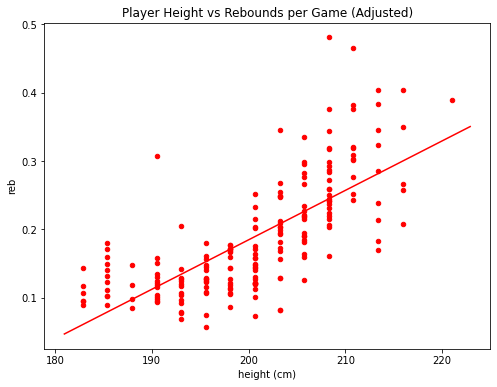

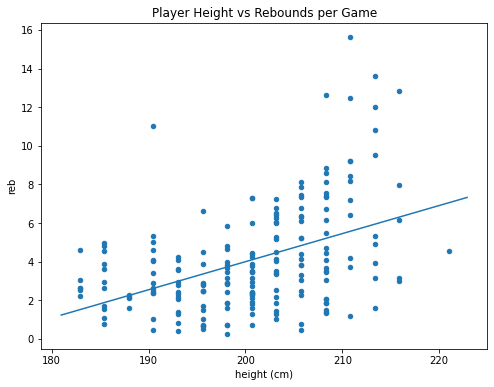

In [0]:
# we should not superimpose these graphs because the scales are different;
# we chose to plot them separately in succession
df_avgs_per_min.plot.scatter(x="height (cm)", y="reb",
                             title="Player Height vs Rebounds per Game (Adjusted)",
                             c="red",
                             figsize=(8, 6))
plot_line_2("height (cm)", "reb")
df_avgs.plot.scatter(x="height (cm)", y="reb",
                     title="Player Height vs Rebounds per Game",
                     figsize=(8, 6))
plot_line("height (cm)", "reb")

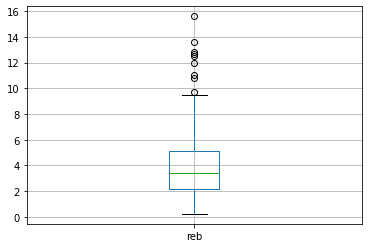

In [0]:
df_avgs.boxplot("reb")

We see that the upward trend towards the higher height values is more noticeable in the red scatterplot, adjusted for minutes played, compared to the blue scatterplot, not adjusted for minutes played. This could be simply because, as evidenced from the boxplot, the variability of rebounds per game is relatively low, but it contains quite a few outliers on the higher end. Those outliers could correspond to players who are taller.

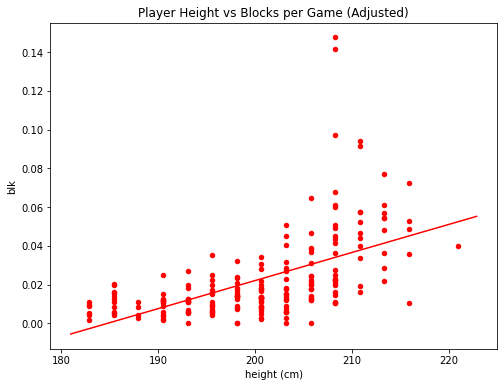

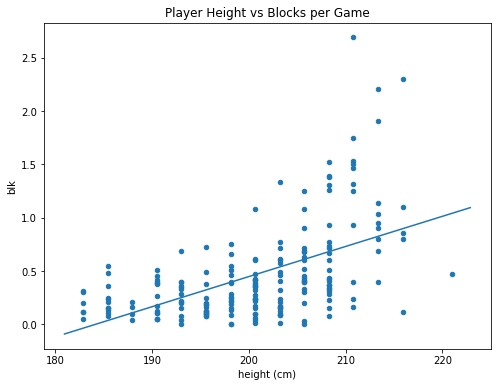

In [0]:
df_avgs_per_min.plot.scatter(x="height (cm)", y="blk",
                             title="Player Height vs Blocks per Game (Adjusted)",
                             c="red",
                             figsize=(8, 6))
plot_line_2("height (cm)", "blk")
df_avgs.plot.scatter(x="height (cm)", y="blk",
                     title="Player Height vs Blocks per Game",
                     figsize=(8, 6))
plot_line("height (cm)", "blk")

Because the blocks correlation coefficient barely increased upon adjusting, it is not as easy to notice the difference visually.

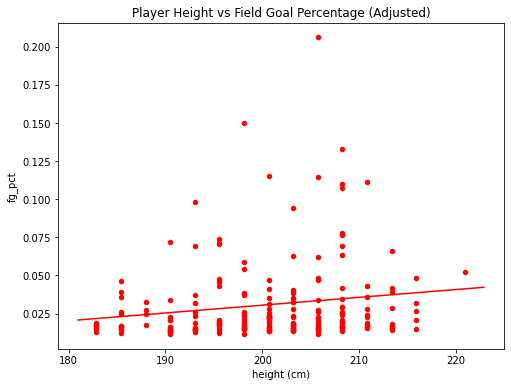

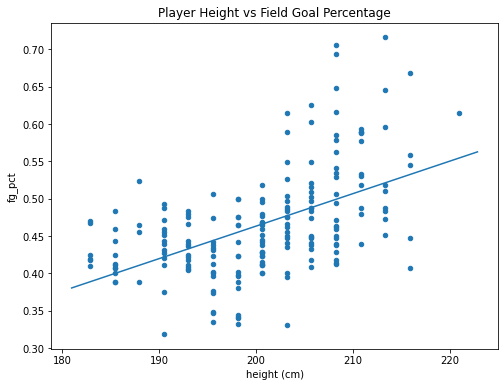

In [0]:
df_avgs_per_min.plot.scatter(x="height (cm)", y="fg_pct",
                             title="Player Height vs Field Goal Percentage (Adjusted)",
                             c="red",
                             figsize=(8, 6))
plot_line_2("height (cm)", "fg_pct")
df_avgs.plot.scatter(x="height (cm)", y="fg_pct",
                     title="Player Height vs Field Goal Percentage",
                     figsize=(8, 6))
plot_line("height (cm)", "fg_pct")

Adjusting for minutes played decreased every player's field goal percentage dramatically. Because those were all decreased, but the heights remained the same, the correlation strength decreased as well. This suggests that our method of adjusting by dividing by the minutes played is not appropriate for certain statistics, including field goal percentage. Since field goal percentage is the ratio of field goals made over field goals attempted, dividing by average time played per game might be an undesirable transformation of the ratios. This is because field goal percentage should generally be independent of minutes per game, since it is just the ratio of field goals made to field goals attempted.

Let's see if segmenting the data by different height cutoffs causes stronger relationships to emerge between height and the other variables.

In [0]:
df_more = df_avgs_per_min[df_avgs_per_min["height (cm)"] >=
                            df_avgs_per_min["height (cm)"].quantile(0.75)]
df_more.corr()["height (cm)"].sort_values(ascending=False)

height (cm)    1.000000
fta            0.263524
ftm            0.243866
turnover       0.233473
reb            0.212321
oreb           0.194730
dreb           0.162837
pts            0.127013
fgm            0.114755
ast            0.095099
pf             0.038462
stl            0.019896
blk            0.011328
fga            0.004366
fg3_pct       -0.018980
fg_pct        -0.142808
ft_pct        -0.164717
fg3m          -0.190758
fg3a          -0.223284
Name: height (cm), dtype: float64

In [0]:
df_less = df_avgs_per_min[df_avgs_per_min["height (cm)"] <=
                            df_avgs_per_min["height (cm)"].quantile(0.25)]
df_less.corr()["height (cm)"].sort_values(ascending=False)

height (cm)    1.000000
fg_pct         0.242038
pf             0.231084
ft_pct         0.216033
fg3_pct        0.215440
blk            0.213620
fg3a           0.071615
fg3m           0.046259
dreb           0.028001
reb            0.020951
fga            0.006705
oreb          -0.012180
fgm           -0.014106
pts           -0.015764
fta           -0.016948
ftm           -0.048815
stl           -0.101837
turnover      -0.129553
ast           -0.511210
Name: height (cm), dtype: float64

In [0]:
df_middle = df_avgs_per_min[(df_avgs_per_min["height (cm)"] > 
                              df_avgs_per_min["height (cm)"].quantile(0.25)) & 
                              (df_avgs_per_min["height (cm)"] <
                              df_avgs_per_min["height (cm)"].quantile(0.75))]
df_middle.corr()["height (cm)"].sort_values(ascending=False)

height (cm)    1.000000
reb            0.595875
dreb           0.511490
oreb           0.500574
blk            0.307239
fgm            0.160307
fta            0.110139
pts            0.093312
ftm            0.085147
turnover       0.042999
fg_pct         0.037716
pf             0.022692
stl            0.004931
fga           -0.031610
ft_pct        -0.098006
ast           -0.114811
fg3_pct       -0.216308
fg3m          -0.230447
fg3a          -0.248696
Name: height (cm), dtype: float64

These also don't reveal any strong relationships between the height of an NBA player and their performance.

However, recall that we are trying to predict a player's height based on multiple statistics. So far, all of our analyses have focused on a single variable's relationship with height. We should now start combining variables, such as the player's position and some other quantitative variable, and see if there exists a relationship with height.

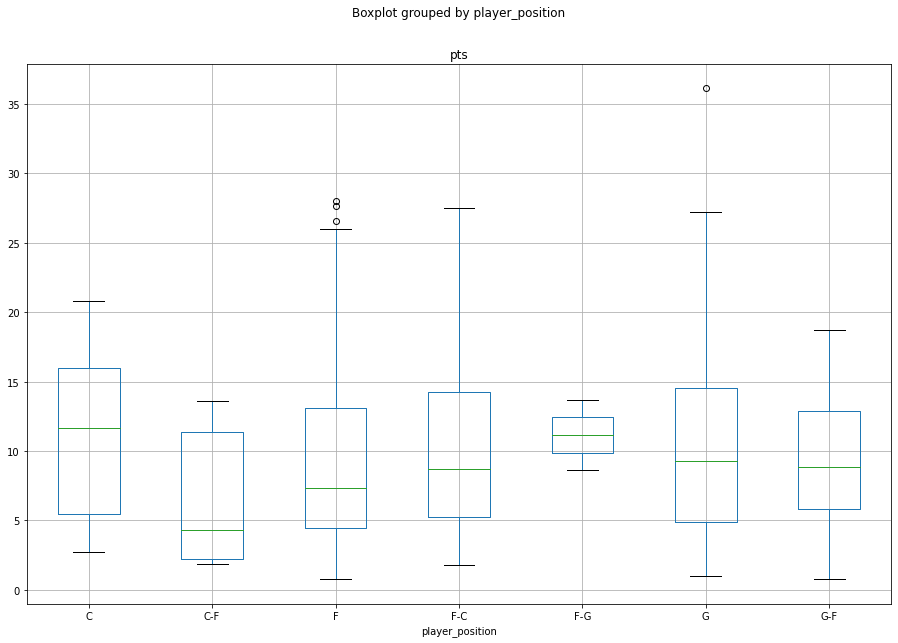

In [0]:
df_avgs.boxplot("pts", by="player_position",
                figsize=(15, 10))

From the boxplot above, it seems that the number of points per game for each position is roughly centered around the same value, albeit with varying ranges/variations. Because we know there is some relationship between the position a player plays and their height, and because the centers of the boxes in the boxplot are roughly the same, we expect there to be a be a somewhat stronger correlation between height and points per game when we groupby the position.

In [0]:
print(df_avgs["height (cm)"].corr(df_avgs["pts"]))
df_avgs.groupby("player_position")["height (cm)"].corr(df_avgs["pts"])

-0.009576405389732414


player_position
C      0.181161
C-F    0.587200
F      0.184263
F-C   -0.249365
F-G    1.000000
G     -0.030488
G-F    0.338193
Name: height (cm), dtype: float64

It seems we were correct. Compared to earlier, when we saw no actual relation between points per game and the height of a player, we now notice that there are some low to moderate strength correlations which emerge when we segregate the data into groups based on player position. Let's view the scatter plot for the position with the highest strength of relationship, or C-F.

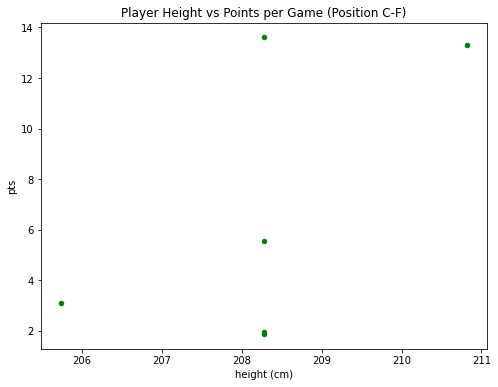

In [0]:
data = df_avgs[df_avgs["player_position"] == "C-F"]
data.plot.scatter(x="height (cm)", y="pts",
                     title="Player Height vs Points per Game (Position C-F)",
                     c="green",
                     figsize=(8, 6))

Unfortunately, it appears that the strength of the relationship is only stronger for this position because of the small sample size. Nevertheless, the various points per game correlations for each position are all stronger than the collective points per game and height correlation. Therefore, it still lends credence to the idea that combining multiple statistics will be a better predictor of height.

Next, instead of scatterplots, let's make good old fashioned line plots of the centers of the statistics we have focused on. Note that we can do this (by using groupby) because the height (cm) is not exactly continuous, since we created it by multiplying the number of inches by 2.54. As a result, there should be multiple players with the same value for height (cm) in our dataframe.

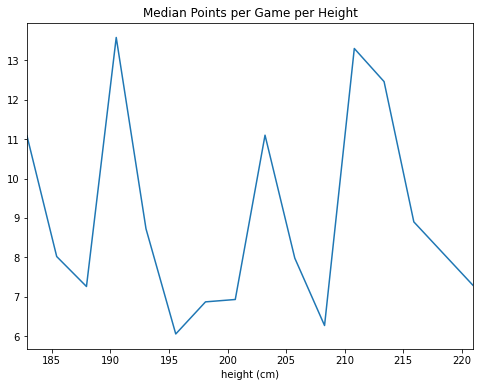

In [0]:
df_avgs.groupby("height (cm)")["pts"].median().plot.line(title="Median Points per Game per Height",
                                                         figsize=(8, 6))

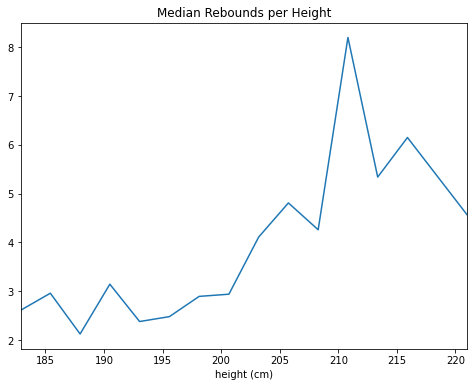

In [0]:
df_avgs.groupby("height (cm)")["reb"].median().plot.line(title="Median Rebounds per Height",
                                                         figsize=(8, 6))

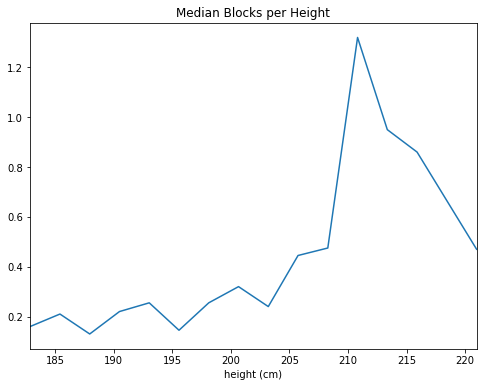

In [0]:
df_avgs.groupby("height (cm)")["blk"].median().plot.line(title="Median Blocks per Height",
                                                         figsize=(8, 6))

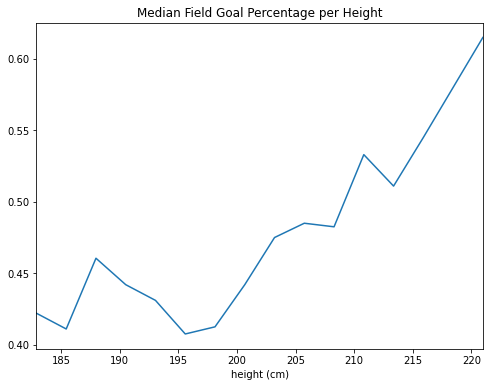

In [0]:
df_avgs.groupby("height (cm)")["fg_pct"].median().plot.line(title="Median Field Goal Percentage per Height",
                                                            figsize=(8, 6))

These graphs mostly depict what we already know: how there is no correlation between points per game and height, and how there is a general positive relationship between height and rebounds per game, blocks per game, and field goal percentage. However, this is in an arguably more intuitive format, and shows how much variability remains in height when only relating it to a single variable at a time.

Finally, let's take a look at the correlation between the remaining variables we started with, rebounds, blocks, and field goal percentage, and the height of a player when segregated by the player's position.

In [0]:
print(df_avgs["height (cm)"].corr(df_avgs["reb"]))
df_avgs.groupby("player_position")["height (cm)"].corr(df_avgs["reb"])

0.4440260155431025


player_position
C      0.013506
C-F    0.618215
F      0.248982
F-C   -0.205194
F-G    1.000000
G     -0.056596
G-F    0.497990
Name: height (cm), dtype: float64

In [0]:
print(df_avgs["height (cm)"].corr(df_avgs["blk"]))
df_avgs.groupby("player_position")["height (cm)"].corr(df_avgs["blk"])

0.5324333578492704


player_position
C      0.123099
C-F    0.890840
F      0.352278
F-C   -0.258160
F-G         NaN
G      0.198036
G-F    0.242446
Name: height (cm), dtype: float64

In [0]:
print(df_avgs["height (cm)"].corr(df_avgs["fg_pct"]))
df_avgs.groupby("player_position")["height (cm)"].corr(df_avgs["fg_pct"])

0.5162730919292913


player_position
C      0.036782
C-F   -0.047732
F      0.361537
F-C   -0.675775
F-G    1.000000
G      0.011575
G-F    0.496563
Name: height (cm), dtype: float64

As opposed to points per game, whose collective correlation coefficient was abysmal, the correlation coefficients for these variables were much more indicative of a relationship. As a result, there was not a stronger correlation across the board for each position for any of these variables. However, we do see interesting facets to this data and how different player positions have different trends with respect to height. For example, we notice that the field goal percentage for position F-C is actually a moderately strong relationship in the negative direction (r=-0.675), which is in wild contrast to the overall correlation which is moderately strong in the positive direction (r=0.516). Throughout this notebook, we have examined that no single variable would be a good predictor of player height.However, because we notice the changes in these trends with respect to player position, we can be pretty confident that a machine learning model which incorporates multiple variables, including player position, will be able to determine the height of a player. This is despite the fact that the relationship between height and a single statistic is either moderately strong at best or nonexistent at worst.

In [0]:
# Below is code we implemented to try and evaluate how multiple quantitative
# variables together correlate with height by standardizing them and then
# multiplying their standardized values; no new insight was gained so its
# analysis/discussion is left out
from sklearn.preprocessing import StandardScaler

df_copy = df_avgs[df_avgs.select_dtypes(exclude="object").columns[3:27]]
df_copy

,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_height_ft,player_height_in,player_weight,height (cm),minutes/gm,sec
0,6.01,10.09,0.00,0.03,1.83,3.65,4.89,4.61,9.50,1.55,1.48,0.95,1.71,2.55,13.85,0.596,0.000,0.500,7.0,0.0,265.0,213.36,33.316667,1999.0
1,8.44,16.28,0.12,0.52,4.31,5.09,3.11,6.09,9.20,2.40,0.53,1.32,1.78,2.21,21.32,0.519,0.238,0.847,6.0,11.0,260.0,210.82,33.166667,1990.0
2,1.40,3.71,0.67,2.06,0.94,1.25,0.06,0.44,0.50,0.52,0.10,0.13,0.69,0.98,4.40,0.376,0.323,0.750,6.0,5.0,198.0,195.58,8.666667,520.0
3,4.19,7.10,0.08,0.56,2.46,3.48,2.40,6.01,8.41,1.38,0.55,1.50,1.30,2.30,10.91,0.590,0.133,0.709,6.0,11.0,237.0,210.82,26.200000,1572.0
4,3.13,7.23,1.17,3.41,1.83,2.11,1.37,6.07,7.44,1.27,0.83,0.40,0.88,1.74,9.27,0.433,0.343,0.867,6.0,9.0,220.0,205.74,27.933333,1676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.00,2.00,0.00,0.00,0.00,0.67,0.67,0.33,1.00,0.33,0.00,0.33,1.00,2.00,2.00,0.500,0.000,0.000,NaN,NaN,NaN,NaN,4.250000,255.0
206,0.43,1.00,0.14,0.14,0.00,0.00,0.57,2.29,2.86,0.57,0.14,0.14,0.71,1.29,1.00,0.429,1.000,0.000,NaN,NaN,NaN,NaN,6.166667,370.0
207,0.87,2.10,0.30,0.93,0.43,0.50,0.23,1.37,1.60,0.97,0.77,0.10,0.57,1.27,2.47,0.413,0.321,0.867,6.0,7.0,185.0,200.66,13.233333,794.0
208,2.95,6.30,1.85,4.45,1.40,1.78,0.63,2.88,3.50,1.00,0.53,0.28,0.88,2.00,9.15,0.468,0.416,0.789,6.0,7.0,220.0,200.66,24.466667,1468.0


In [0]:
df_copy.dropna(inplace=True)
df_copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_height_ft,player_height_in,player_weight,height (cm),minutes/gm,sec
0,6.01,10.09,0.00,0.03,1.83,3.65,4.89,4.61,9.50,1.55,1.48,0.95,1.71,2.55,13.85,0.596,0.000,0.500,7.0,0.0,265.0,213.36,33.316667,1999.0
1,8.44,16.28,0.12,0.52,4.31,5.09,3.11,6.09,9.20,2.40,0.53,1.32,1.78,2.21,21.32,0.519,0.238,0.847,6.0,11.0,260.0,210.82,33.166667,1990.0
2,1.40,3.71,0.67,2.06,0.94,1.25,0.06,0.44,0.50,0.52,0.10,0.13,0.69,0.98,4.40,0.376,0.323,0.750,6.0,5.0,198.0,195.58,8.666667,520.0
3,4.19,7.10,0.08,0.56,2.46,3.48,2.40,6.01,8.41,1.38,0.55,1.50,1.30,2.30,10.91,0.590,0.133,0.709,6.0,11.0,237.0,210.82,26.200000,1572.0
4,3.13,7.23,1.17,3.41,1.83,2.11,1.37,6.07,7.44,1.27,0.83,0.40,0.88,1.74,9.27,0.433,0.343,0.867,6.0,9.0,220.0,205.74,27.933333,1676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.67,1.48,0.17,0.54,0.29,0.42,0.44,0.58,1.02,0.29,0.15,0.13,0.29,0.62,1.81,0.455,0.321,0.682,6.0,8.0,260.0,203.20,4.816667,289.0
202,5.47,10.38,0.63,1.80,1.07,1.67,2.36,4.06,6.42,2.52,1.52,0.46,1.52,2.40,12.64,0.527,0.349,0.644,6.0,8.0,221.0,203.20,30.716667,1843.0
203,3.59,6.42,0.00,0.00,1.71,2.14,1.95,4.20,6.15,1.07,0.25,0.86,1.19,2.32,8.90,0.559,0.000,0.802,7.0,1.0,240.0,215.90,17.600000,1056.0
207,0.87,2.10,0.30,0.93,0.43,0.50,0.23,1.37,1.60,0.97,0.77,0.10,0.57,1.27,2.47,0.413,0.321,0.867,6.0,7.0,185.0,200.66,13.233333,794.0


In [0]:
scaler = StandardScaler()
scaler.fit(df_copy)
df_copy_st = scaler.transform(df_copy)

df_copy_st = pd.DataFrame(df_copy_st, columns=df_avgs.select_dtypes(exclude="object").columns[3:27])
df_copy_st["height (cm)"] = df_avgs["height (cm)"]
df_copy_st

,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_height_ft,player_height_in,player_weight,height (cm),minutes/gm,sec
0,0.963916,0.436225,-1.153815,-1.230736,0.145734,0.828810,4.663632,0.706356,1.980838,-0.360202,1.826368,1.100962,0.617068,0.940175,0.564473,1.848824,-2.648294,-1.968750,3.50238,-1.826189,2.017994,213.36,1.285812,1.285812
1,1.971484,1.665880,-1.022215,-1.021077,1.741886,1.582527,2.581804,1.418832,1.871873,0.075435,-0.341627,1.930005,0.699246,0.483650,1.666992,0.761694,-0.625417,0.746139,-0.28552,1.513434,1.804228,210.82,1.269614,1.269614
2,-0.947560,-0.831173,-0.419048,-0.362147,-0.427079,-0.427385,-0.985375,-1.301094,-1.288100,-0.888092,-1.322930,-0.736377,-0.580374,-1.167898,-0.830281,-1.257263,0.097039,-0.012778,-0.28552,-0.308179,-0.846470,195.58,-1.376063,-1.376063
3,0.209277,-0.157744,-1.066081,-1.003962,0.551208,0.739829,1.751411,1.380319,1.584933,-0.447330,-0.295985,2.333324,0.135743,0.604495,0.130549,1.764113,-1.517862,-0.333557,-0.28552,1.513434,0.820904,210.82,0.517306,0.517306
4,-0.230238,-0.131919,0.129285,0.215486,0.145734,0.022751,0.546758,1.409204,1.232614,-0.503706,0.343003,-0.131399,-0.357321,-0.147430,-0.111503,-0.452504,0.267029,0.902617,-0.28552,0.906229,0.094100,205.74,0.704483,0.704483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1.250245,-1.274167,-0.967381,-1.012519,-0.845425,-0.861819,-0.540939,-1.233697,-1.099228,-1.005971,-1.208825,-0.736377,-1.049960,-1.651278,-1.212547,-0.141895,0.080040,-0.544802,-0.28552,0.602627,1.804228,195.58,-1.791813,-1.791813
195,0.740012,0.493835,-0.462915,-0.473395,-0.343410,-0.207551,1.704629,0.441584,0.862135,0.136937,1.917652,0.003040,0.394015,0.738767,0.385885,0.874642,0.318026,-0.842110,-0.28552,0.602627,0.136853,193.04,1.005046,1.005046
196,-0.039505,-0.292827,-1.153815,-1.243573,0.068501,0.038454,1.225106,0.508981,0.764066,-0.606209,-0.980615,0.899303,0.006607,0.631349,-0.166113,1.326437,-2.648294,0.394064,3.50238,-1.522587,0.949164,190.50,-0.411381,-0.411381
197,-1.167318,-1.151003,-0.824815,-0.845647,-0.755320,-0.819946,-0.786548,-0.853389,-0.888564,-0.657461,0.206077,-0.803597,-0.721250,-0.778509,-1.115136,-0.734875,0.080040,0.902617,-0.28552,0.299025,-1.402262,193.04,-0.882924,-0.882924


In [0]:
df_copy_st["reb*pts"] = np.abs(df_copy_st["reb"] * df_copy_st["pts"])
df_copy_st["reb*fg_pct"] = np.abs(df_copy_st["reb"] * df_copy_st["fg_pct"])
df_copy_st["reb*blk"] = np.abs(df_copy_st["reb"] * df_copy_st["blk"])
df_copy_st

,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,player_height_ft,player_height_in,player_weight,height (cm),minutes/gm,sec,reb*pts,reb*fg_pct,reb*blk
0,0.963916,0.436225,-1.153815,-1.230736,0.145734,0.828810,4.663632,0.706356,1.980838,-0.360202,1.826368,1.100962,0.617068,0.940175,0.564473,1.848824,-2.648294,-1.968750,3.50238,-1.826189,2.017994,213.36,1.285812,1.285812,1.118129,3.662221,2.180827
1,1.971484,1.665880,-1.022215,-1.021077,1.741886,1.582527,2.581804,1.418832,1.871873,0.075435,-0.341627,1.930005,0.699246,0.483650,1.666992,0.761694,-0.625417,0.746139,-0.28552,1.513434,1.804228,210.82,1.269614,1.269614,3.120399,1.425794,3.612725
2,-0.947560,-0.831173,-0.419048,-0.362147,-0.427079,-0.427385,-0.985375,-1.301094,-1.288100,-0.888092,-1.322930,-0.736377,-0.580374,-1.167898,-0.830281,-1.257263,0.097039,-0.012778,-0.28552,-0.308179,-0.846470,195.58,-1.376063,-1.376063,1.069485,1.619481,0.948527
3,0.209277,-0.157744,-1.066081,-1.003962,0.551208,0.739829,1.751411,1.380319,1.584933,-0.447330,-0.295985,2.333324,0.135743,0.604495,0.130549,1.764113,-1.517862,-0.333557,-0.28552,1.513434,0.820904,210.82,0.517306,0.517306,0.206912,2.796000,3.698162
4,-0.230238,-0.131919,0.129285,0.215486,0.145734,0.022751,0.546758,1.409204,1.232614,-0.503706,0.343003,-0.131399,-0.357321,-0.147430,-0.111503,-0.452504,0.267029,0.902617,-0.28552,0.906229,0.094100,205.74,0.704483,0.704483,0.137440,0.557763,0.161965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1.250245,-1.274167,-0.967381,-1.012519,-0.845425,-0.861819,-0.540939,-1.233697,-1.099228,-1.005971,-1.208825,-0.736377,-1.049960,-1.651278,-1.212547,-0.141895,0.080040,-0.544802,-0.28552,0.602627,1.804228,195.58,-1.791813,-1.791813,1.332866,0.155975,0.809446
195,0.740012,0.493835,-0.462915,-0.473395,-0.343410,-0.207551,1.704629,0.441584,0.862135,0.136937,1.917652,0.003040,0.394015,0.738767,0.385885,0.874642,0.318026,-0.842110,-0.28552,0.602627,0.136853,193.04,1.005046,1.005046,0.332685,0.754059,0.002621
196,-0.039505,-0.292827,-1.153815,-1.243573,0.068501,0.038454,1.225106,0.508981,0.764066,-0.606209,-0.980615,0.899303,0.006607,0.631349,-0.166113,1.326437,-2.648294,0.394064,3.50238,-1.522587,0.949164,190.50,-0.411381,-0.411381,0.126921,1.013486,0.687127
197,-1.167318,-1.151003,-0.824815,-0.845647,-0.755320,-0.819946,-0.786548,-0.853389,-0.888564,-0.657461,0.206077,-0.803597,-0.721250,-0.778509,-1.115136,-0.734875,0.080040,0.902617,-0.28552,0.299025,-1.402262,193.04,-0.882924,-0.882924,0.990869,0.652983,0.714047


In [0]:
df_avgs.groupby("player_position")["height (cm)"].corr(df_avgs_per_min["pts"])

player_position
C      0.382895
C-F    0.380836
F      0.351854
F-C   -0.335430
F-G   -1.000000
G     -0.040080
G-F    0.519068
Name: height (cm), dtype: float64

0.15942668656404685

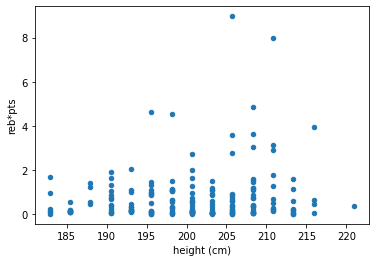

In [0]:
df_copy_st.plot.scatter(x="height (cm)", y="reb*pts")
df_copy_st["height (cm)"].corr(df_copy_st["reb*pts"])

In [0]:
df_copy_st.corr()["height (cm)"].sort_values()

pf                 -0.038125
fg3_pct            -0.006912
ft_pct             -0.001236
player_weight       0.002860
player_height_in    0.016752
fg3m                0.019225
fg3a                0.032362
fg_pct              0.037604
player_height_ft    0.050721
blk                 0.054031
oreb                0.059186
reb*fg_pct          0.064412
stl                 0.070658
dreb                0.074215
reb                 0.074403
minutes/gm          0.077808
sec                 0.077808
reb*blk             0.078958
ast                 0.079308
turnover            0.098264
fga                 0.108513
fgm                 0.116654
pts                 0.122293
ftm                 0.158794
reb*pts             0.159427
fta                 0.160682
height (cm)         1.000000
Name: height (cm), dtype: float64